In [2]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the dataset
dataset = pd.read_csv('/kaggle/input/penguin-cleaned/penguins_cleaned.csv')

In [4]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [5]:

X_classification = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_classification = dataset['species']


In [6]:

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.30, random_state=42
)

In [7]:
scaler_classification = StandardScaler()
X_train_classification = scaler_classification.fit_transform(X_train_classification)
X_test_classification = scaler_classification.transform(X_test_classification)

## Gaussian Naive Bayes (including confusion matrix, classification report, likelihood and frequency table)

In [8]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_classification, y_train_classification)
y_pred_gaussian = gaussian_nb.predict(X_test_classification)

print(y_pred_gaussian)

['Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie']


Confusion Matrix:
[[48  0  0]
 [ 3 20  0]
 [ 0  0 29]]


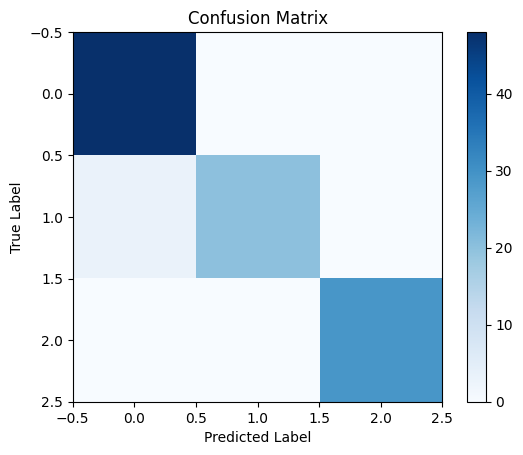


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        48
   Chinstrap       1.00      0.87      0.93        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100


Likelihood (Mean):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.968981       0.640907          -0.809204    -0.677790
1        0.847309       0.698619          -0.435830    -0.601843
2        0.631458      -1.047187           1.099048     1.038959
Frequency Table:
Predicted  Adelie  Chinstrap  Gentoo
Actual                              
Adelie         48          0       0
Chinstrap       3         20       0
Gentoo          0          0      29


In [9]:
# Confusion matrix and classification report
print("Confusion Matrix:")
conf_matrix_gaussian = confusion_matrix(y_test_classification, y_pred_gaussian)
print(conf_matrix_gaussian)
# Plot Confusion Matrix
plt.imshow(conf_matrix_gaussian, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test_classification, y_pred_gaussian))


likelihood_mean = gaussian_nb.theta_

# Display the likelihood
print("\nLikelihood (Mean):")
print(pd.DataFrame(likelihood_mean, columns=X_classification.columns))

frequency_table = pd.crosstab(y_test_classification, y_pred_gaussian, rownames=['Actual'], colnames=['Predicted'])
print("Frequency Table:")
print(frequency_table)


## Multinomial Naive Bayes  (including confusion matrix, classification report, likelihood and frequency table)

In [10]:
X_train_multinomial = X_train_classification.clip(min=0)  # Clip negative values to 0
X_test_multinomial = X_test_classification.clip(min=0)

In [11]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_multinomial, y_train_classification)
y_pred_multinomial = multinomial_nb.predict(X_test_multinomial)

print(y_pred_multinomial)

['Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie']


Confusion Matrix:
[[48  0  0]
 [ 3 18  2]
 [ 0  0 29]]


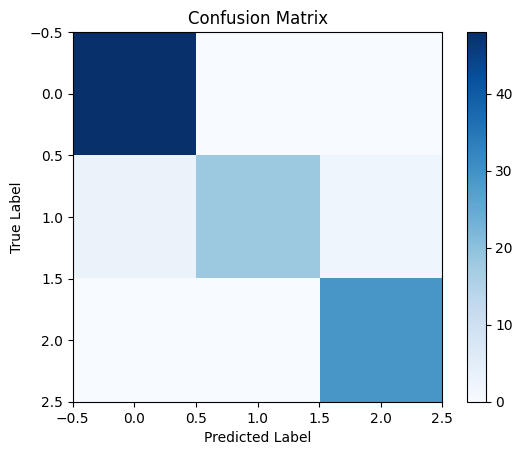


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        48
   Chinstrap       1.00      0.78      0.88        23
      Gentoo       0.94      1.00      0.97        29

    accuracy                           0.95       100
   macro avg       0.96      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Frequency Table:
Predicted  Adelie  Chinstrap  Gentoo
Actual                              
Adelie         48          0       0
Chinstrap       3         18       2
Gentoo          0          0      29

Likelihood (Log Probabilities):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        0.024823       0.877269           0.030942     0.066966
1        0.498711       0.418840           0.047124     0.035324
2        0.236637       0.004043           0.389731     0.369589


In [12]:
# Confusion matrix and classification report
print("Confusion Matrix:")
conf_matrix_multinomial = confusion_matrix(y_test_classification, y_pred_multinomial)
print(conf_matrix_multinomial)
# Plot Confusion Matrix
plt.imshow(conf_matrix_multinomial, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_classification, y_pred_multinomial))

frequency_table = pd.crosstab(y_test_classification, y_pred_multinomial, rownames=['Actual'], colnames=['Predicted'])
print("Frequency Table:")
print(frequency_table)

likelihood = np.exp(multinomial_nb.feature_log_prob_)
print("\nLikelihood (Log Probabilities):")
print(pd.DataFrame(likelihood, columns=X_classification.columns))

## Bernoulli Naive Bayes for the boolean feature 'sex' (including confusion matrix, classification report, likelihood and frequency table)

In [13]:
# Assume 'sex' column contains 'Male' and 'Female'. Convert to 0 for Male, 1 for Female
dataset['sex'] = (dataset['sex'] == 'Female').astype(int)

# Select features and target variable for classification
X_boolean_classification = dataset[['bill_length_mm', 'bill_depth_mm', 'sex']]
y_classification = dataset['species']

# Split the dataset into training and testing sets
X_train_boolean, X_test_boolean, y_train_boolean, y_test_boolean = train_test_split(
    X_boolean_classification, y_classification, test_size=0.30, random_state=42
)

scaler_boolean_classification = StandardScaler()
X_train_boolean = scaler_boolean_classification.fit_transform(X_train_boolean)
X_test_boolean = scaler_boolean_classification.transform(X_test_boolean)

In [14]:
# Bernoulli Naive Bayes with 'sex' as a boolean feature
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_boolean, y_train_boolean)

y_pred_bernoulli = bernoulli_nb.predict(X_test_boolean)

print(y_pred_bernoulli)

['Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie']



Bernoulli Naive Bayes with 'sex' as a boolean feature:
Confusion Matrix:
[[48  0  0]
 [ 3 18  2]
 [ 3  2 24]]


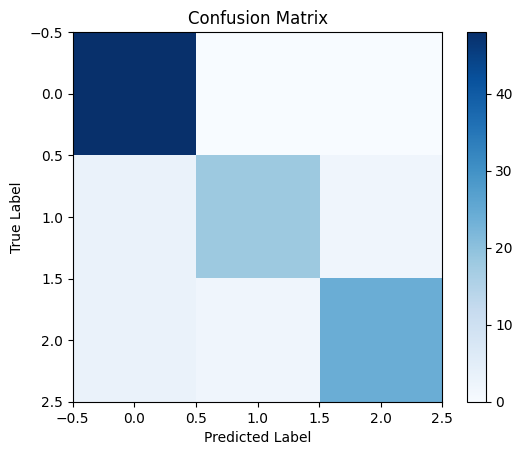


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.89      1.00      0.94        48
   Chinstrap       0.90      0.78      0.84        23
      Gentoo       0.92      0.83      0.87        29

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100

Frequency Table:
Predicted  Adelie  Chinstrap  Gentoo
Actual                              
Adelie         48          0       0
Chinstrap       3         18       2
Gentoo          3          2      24

Likelihood (Log Probabilities):
   bill_length_mm  bill_depth_mm       sex
0        0.040000       0.850000  0.010000
1        0.914894       0.851064  0.021277
2        0.847826       0.021739  0.010870


In [15]:
print("\nBernoulli Naive Bayes with 'sex' as a boolean feature:")
print("Confusion Matrix:")
conf_matrix_bernoulli = confusion_matrix(y_test_boolean, y_pred_bernoulli)
print(conf_matrix_bernoulli)

# Plot Confusion Matrix
plt.imshow(conf_matrix_bernoulli, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_boolean, y_pred_bernoulli))

# Frequency table and likelihood
print("Frequency Table:")
frequency_table_bernoulli = pd.crosstab(y_test_boolean, y_pred_bernoulli, rownames=['Actual'], colnames=['Predicted'])
print(frequency_table_bernoulli)


likelihood_bernoulli = np.exp(bernoulli_nb.feature_log_prob_)
print("\nLikelihood (Log Probabilities):")
print(pd.DataFrame(likelihood_bernoulli, columns=X_boolean_classification.columns))

In [16]:
# Spam detection example (using Bernoulli Naive Bayes)
# Assuming you have a column 'is_spam' indicating whether an email is spam or not

spam_dataset = pd.DataFrame({
    'text': ['Buy now!', 'Hello, how are you?', 'Free trial offer!', 'Important meeting tomorrow'],
    'is_spam': [1, 0, 1, 0]  # 1 for spam, 0 for not spam
})

# Feature extraction (using a simple boolean feature for each keyword)
keywords = ['buy', 'free', 'offer', 'meeting']
for keyword in keywords:
    spam_dataset[keyword] = spam_dataset['text'].str.contains(keyword, case=False).astype(int)

X_spam = spam_dataset[keywords]
y_spam = spam_dataset['is_spam']

# Train Bernoulli Naive Bayes for spam detection
bernoulli_nb_spam = BernoulliNB()
bernoulli_nb_spam.fit(X_spam, y_spam)

# Predictions
spam_dataset['predicted_spam'] = bernoulli_nb_spam.predict(X_spam)

# Display the results
print("\nSpam Detection Example:")
print(spam_dataset[['text', 'is_spam', 'predicted_spam']])


Spam Detection Example:
                         text  is_spam  predicted_spam
0                    Buy now!        1               1
1         Hello, how are you?        0               0
2           Free trial offer!        1               1
3  Important meeting tomorrow        0               0
